Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

Loading the dataset

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

Print the first 5 rows of the dataframe.

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Load the statistics of the dataset

In [4]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


Information of data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


Check if there is Duplicated in the dataset

In [10]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995     True
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

Drop Duplication

In [11]:
df.drop_duplicates()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


Plot all columns

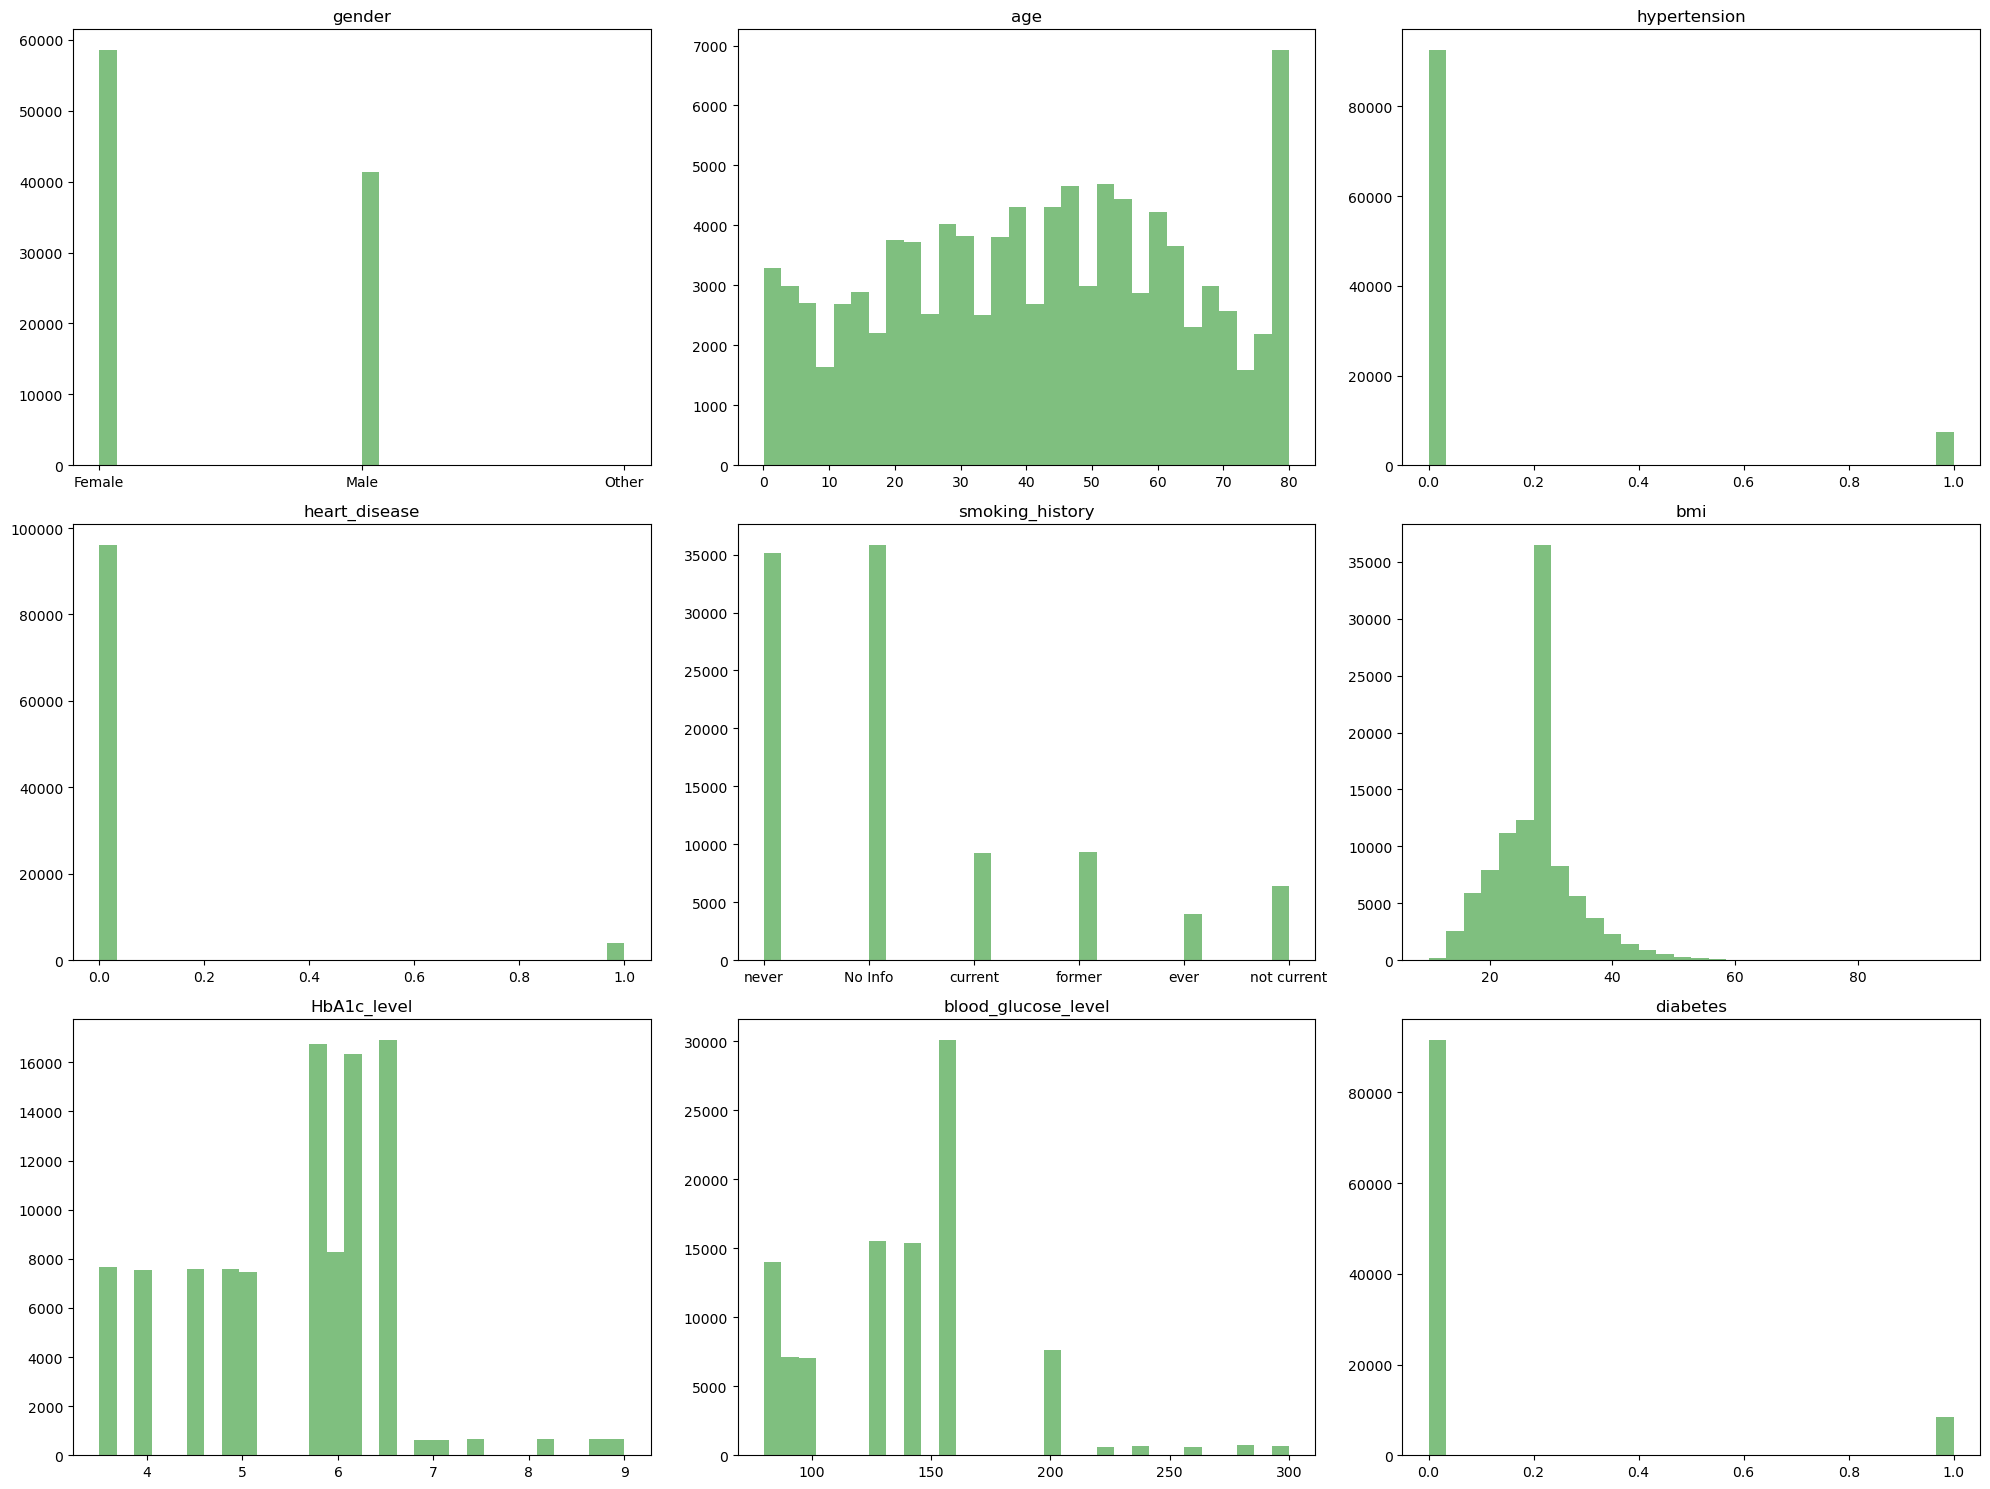

In [60]:
rows = 3
col = 3
fig, axs = plt.subplots(rows, col, figsize=(20, 15))
axs = axs.ravel()
for i in range(rows * col):
    axs[i].hist(df.iloc[:, i], bins=30, color='g', alpha=0.5)
    axs[i].set_title(df.columns[i])
plt.tight_layout()
plt.show()

Check if there is null values

In [4]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Visualizing Missing Values

<Axes: >

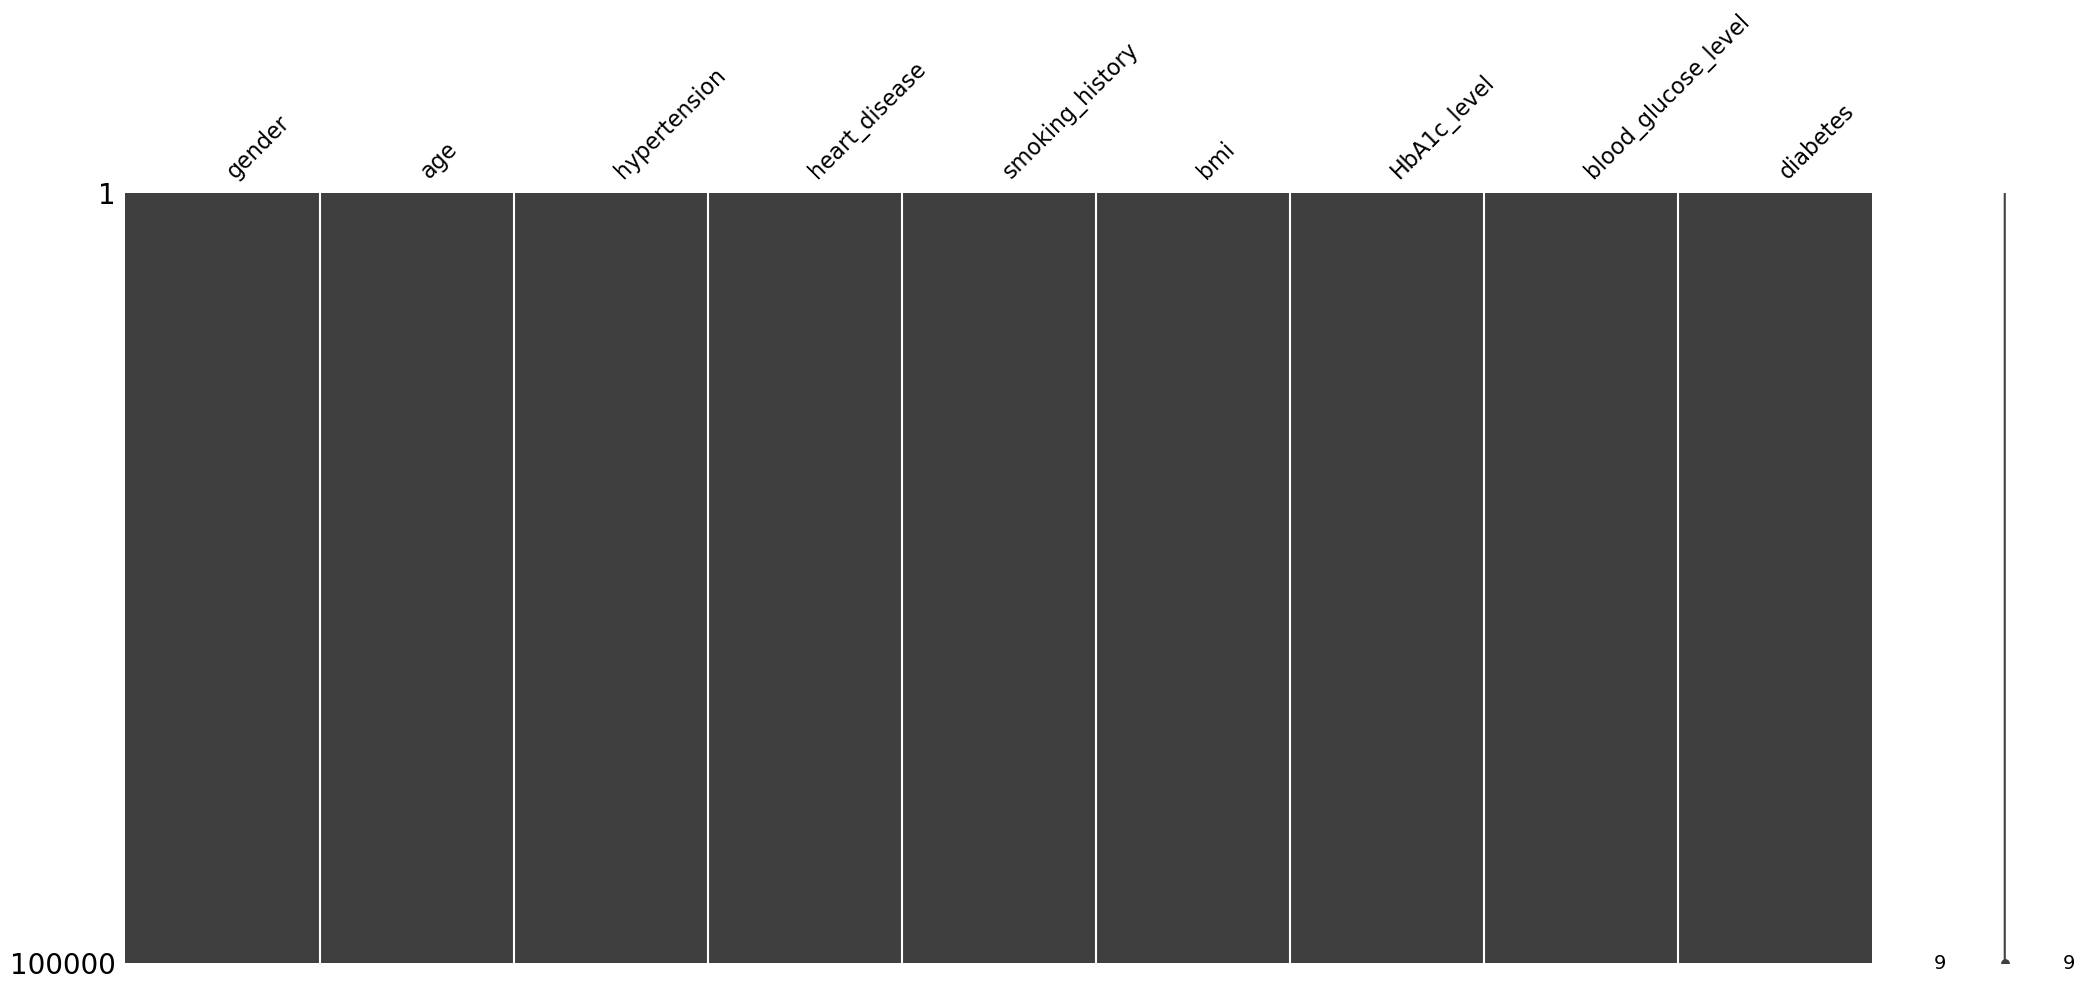

In [48]:
import missingno as msno
msno.matrix(df)

Observing the shape of the data

In [61]:
df.shape

(100000, 9)

Knowing the data type of each column

In [5]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

Plotting the data type analysis before preprossing

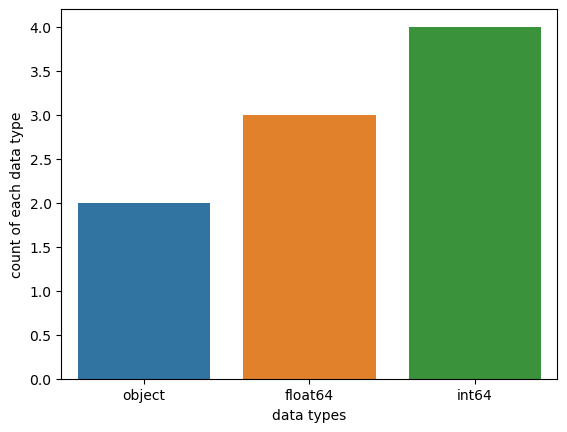

In [62]:
sns.countplot(x=df.dtypes ,data=df)
plt.ylabel("count of each data type")
plt.xlabel("data types")
plt.show()

Define the value that exsits in Smoking column "Object"

In [38]:
df["smoking_history"].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

Define the value that exsits in Gender column "Object"

In [39]:
df["gender"].unique()

array(['Female', 'Male', 'Other'], dtype=object)

Colunms Name in the dataset

In [40]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

Convert the values in Gender and Smoking columns into integer by using LabelEncoder

In [41]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
lb = LabelEncoder()
df["gender"] = lb.fit_transform(df["gender"] )
df["smoking_history"] = lb.fit_transform(df["smoking_history"] )

Define the value that exsits in Smoking column "Integers"

In [42]:
df["smoking_history"].unique()

array([4, 0, 1, 3, 2, 5])

Define the value that exsits in Gender column "Integers"

In [43]:
df["gender"].unique()

array([0, 1, 2])

In [44]:
df.dtypes

gender                   int32
age                    float64
hypertension             int64
heart_disease            int64
smoking_history          int32
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

Plotting the data type analysis after preprossing

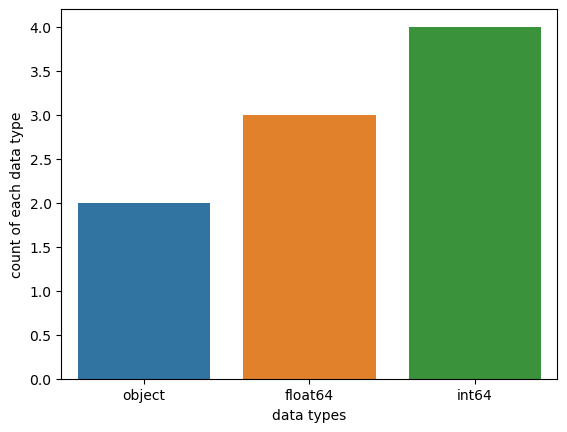

In [17]:
sns.countplot(x=df.dtypes ,data=df)
plt.ylabel("count of each data type")
plt.xlabel("data types")
plt.show()

Plotting the target Variable

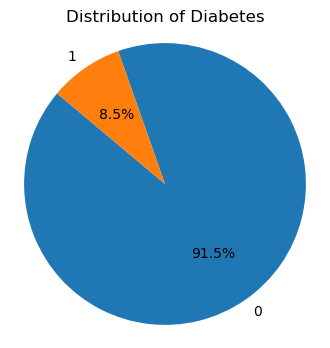

In [19]:
diabetes_counts = df['diabetes'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Diabetes')
plt.axis('equal')

plt.show()

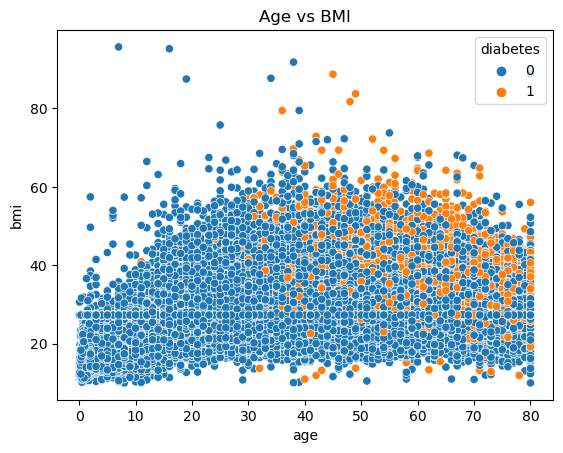

In [58]:
# Scatterplot Age vs BMI colored by Diabetes classification
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=df)
plt.title('Age vs BMI')
plt.show()

Scatter 

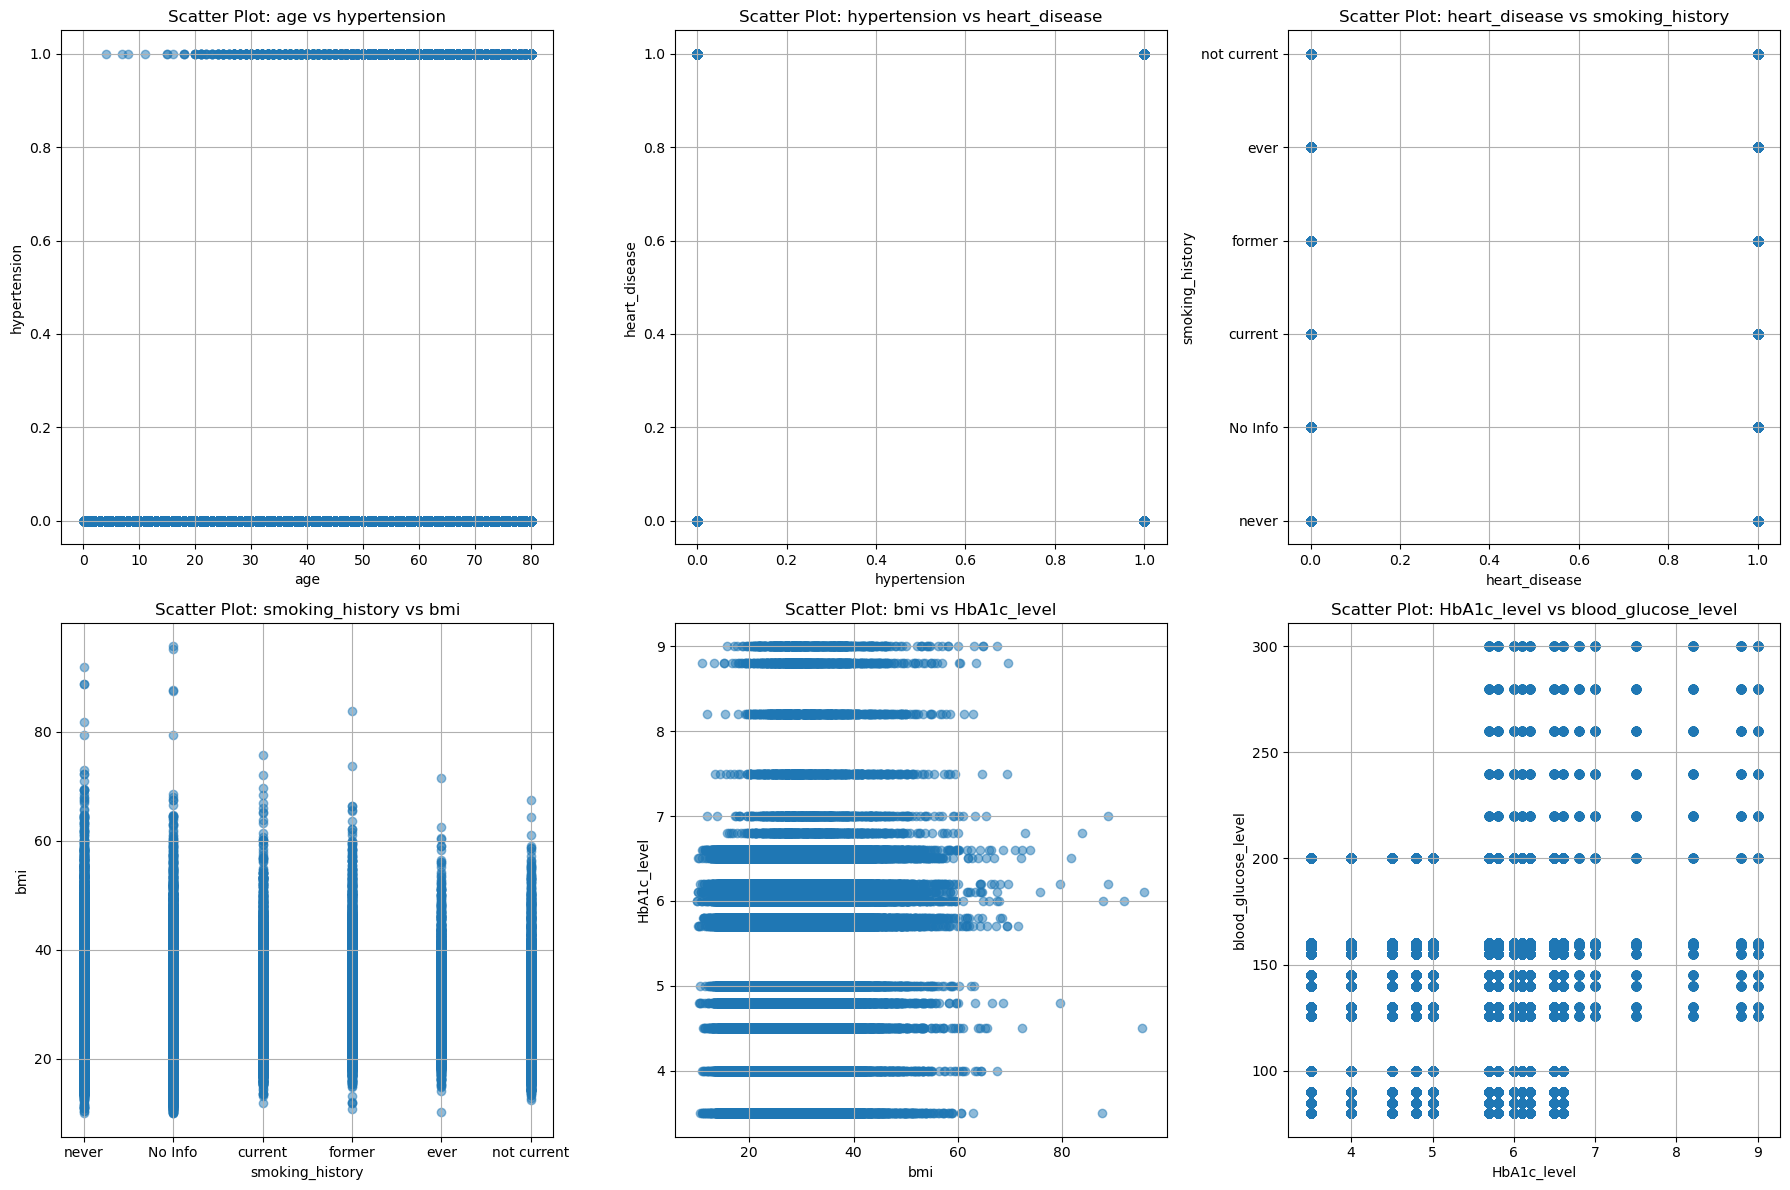

In [36]:
variables = ['age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

k = 0
for i in range(2):
    for j in range(3):
        if k < len(variables)-1:
            axs[i, j].scatter(df[variables[k]], df[variables[k+1]], alpha=0.5)
            axs[i, j].set_title(f'Scatter Plot: {variables[k]} vs {variables[k+1]}')
            axs[i, j].set_xlabel(variables[k])
            axs[i, j].set_ylabel(variables[k+1])
            axs[i, j].grid(True)
            k += 1

plt.tight_layout()
plt.show()


The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

Pair plot for clean data

C:\Users\Amera\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Amera\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Amera\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Amera\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

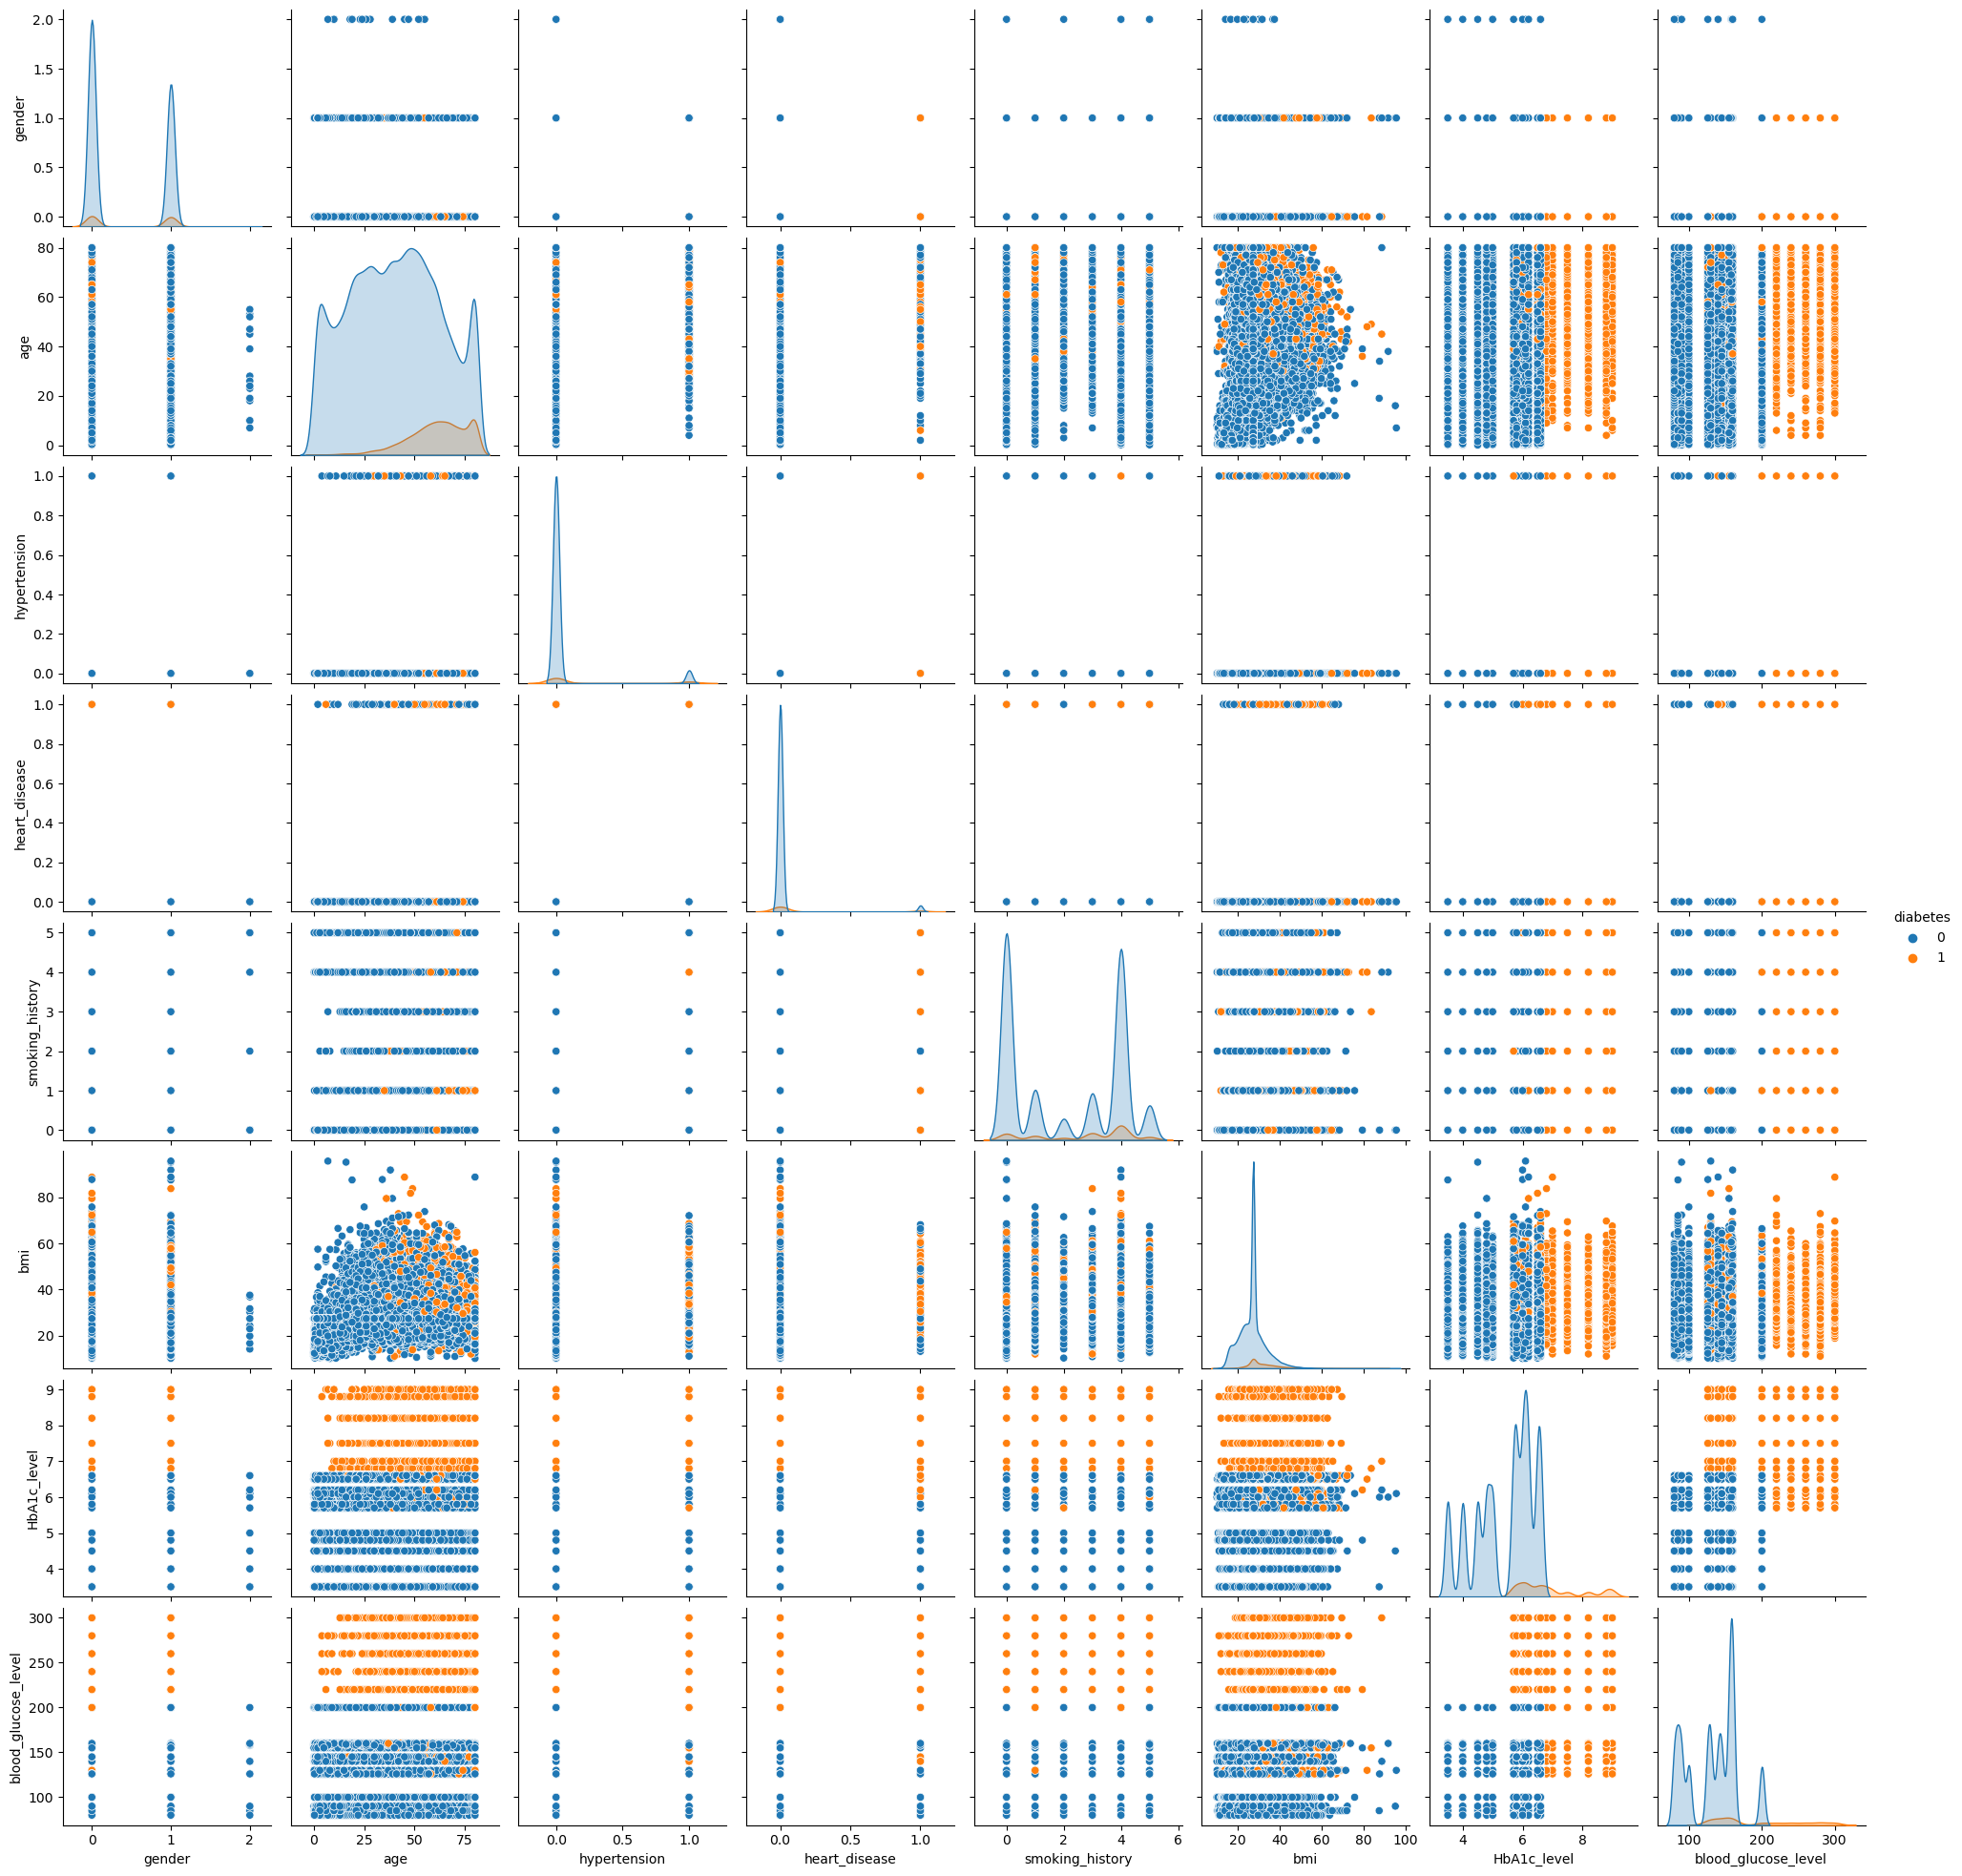

In [108]:
%matplotlib inline
sns.pairplot(data=df, diag_kind='kde', hue='diabetes')
plt.show()

Make the range of data between [-1,1] "Normalization" by using "StandardScaler"

In [45]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df.drop(["diabetes"],axis = 1),),
        columns=['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history','bmi', 'HbA1c_level', 'blood_glucose_level'])

In [46]:
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,-0.841047,1.692704,-0.284439,4.936379,0.963327,-0.321056,1.001706,0.047704
1,-0.841047,0.538006,-0.284439,-0.202578,-1.153468,-0.000116,1.001706,-1.426210
2,1.187234,-0.616691,-0.284439,-0.202578,0.963327,-0.000116,0.161108,0.489878
3,-0.841047,-0.261399,-0.284439,-0.202578,-0.624269,-0.583232,-0.492690,0.416183
4,1.187234,1.515058,3.515687,4.936379,-0.624269,-1.081970,-0.679490,0.416183


Assign the target column to y 

In [47]:
y = df.diabetes

Feature Selection "We do not need it in our project"

In [ ]:
# Perform feature selection
#selector = SelectKBest(score_func=f_classif, k=8)  # Select top 5 features 
#X_selected = selector.fit_transform(X, y)

# Get selected feature indices
#selected_indices = selector.get_support(indices=True)

# Print selected feature names
#selected_feature_names = X.columns[selected_indices]
#print("Selected Features:")
#print(selected_feature_names)

Splitting the data

In [48]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.33)

# Applying LogisticRegression Model

In [87]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='sag',C=2,random_state=33,max_iter=100)
log_reg.fit(X_train, y_train)

LogisticRegression(C=2, random_state=33, solver='sag')

Calculate train and test score

In [88]:
print('LogisticRegressionModel Train Score is: ' , log_reg.score(X_train, y_train))
print('LogisticRegressionModel Test Score is: ' , log_reg.score(X_test, y_test))
print('LogisticRegressionModel Classes are: ' , log_reg.classes_)
print('LogisticRegressionModel No. of iteratios is: ' , log_reg.n_iter_)

LogisticRegressionModel Train Score is:  0.9604477611940299
LogisticRegressionModel Test Score is:  0.9596363636363636
LogisticRegressionModel Classes are:  [0 1]
LogisticRegressionModel No. of iteratios is:  [22]


Calculate Prediction

In [89]:
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)
print('Predicted Value for LogisticRegressionModel is: ' , y_pred[:10])
print('Prediction Probabilities Value for LogisticRegressionModel is: \n' , y_pred_prob[:10])

Predicted Value for LogisticRegressionModel is:  [0 0 0 0 0 0 0 0 0 0]
Prediction Probabilities Value for LogisticRegressionModel is: 
 [[9.99818255e-01 1.81744714e-04]
 [9.99995697e-01 4.30291905e-06]
 [9.63052828e-01 3.69471722e-02]
 [9.89490824e-01 1.05091762e-02]
 [5.53915677e-01 4.46084323e-01]
 [9.99180445e-01 8.19554993e-04]
 [9.99922548e-01 7.74515799e-05]
 [9.25028210e-01 7.49717895e-02]
 [9.90295738e-01 9.70426239e-03]
 [9.99774492e-01 2.25508257e-04]]


Calculating confusion_matrix

In [118]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[30026   265]
 [ 1046  1663]]


Classification report

In [119]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     30291
           1       0.86      0.61      0.72      2709

    accuracy                           0.96     33000
   macro avg       0.91      0.80      0.85     33000
weighted avg       0.96      0.96      0.96     33000



Data visualization of the confusion matrix

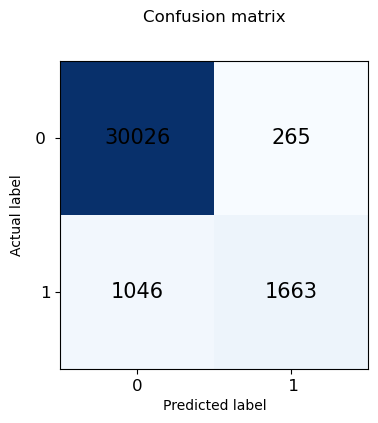

In [120]:
from sklearn import metrics
y_pred = log_reg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
fig , ax = plt.subplots (figsize = (4,4))
im = ax.imshow(cm, cmap='Blues')  # Change the color map here

ax.grid (False)
ax.xaxis.set (ticks = (0 , 1) , ticklabels = ("0" , " 1"))
ax.yaxis.set (ticks = (0 , 1) , ticklabels = (" 0 " , "1"))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix', y=1.1)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_ylim (1.5 , -0.5)
for i in range (2):
    for j in range (2):
        ax.text (j , i , cnf_matrix[i,j] , ha = "center" , va ="center" , color ="Black", fontsize = 15 )
plt.show()

In [121]:
from sklearn.metrics import confusion_matrix, accuracy_score, zero_one_loss
Zero = zero_one_loss(y_test,y_pred,normalize=False) 
print('Zero One Loss Value: ', Zero)

Zero One Loss Value:  1311


# Applying KNN Model

In [90]:
knn_classifier = KNeighborsClassifier(n_neighbors = 20, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

Calculate train and test score

In [91]:
print('KNN Train Score is: ' , knn_classifier.score(X_train, y_train))
print('KNN Test Score is: ' , knn_classifier.score(X_test, y_test))
print('KNN Classes are: ' , knn_classifier.classes_)

KNN Train Score is:  0.9637910447761194
KNN Test Score is:  0.9612121212121212
KNN Classes are:  [0 1]


Calculate Predictions

In [92]:
y_pred = knn_classifier.predict(X_test)
y_pred_prob = knn_classifier.predict_proba(X_test)
print('Predicted Value for LogisticRegressionModel is: ' , y_pred[:10])
print('Prediction Probabilities Value for LogisticRegressionModel is: \n' , y_pred_prob[:10])

Predicted Value for LogisticRegressionModel is:  [0 0 0 0 0 0 0 0 0 0]
Prediction Probabilities Value for LogisticRegressionModel is: 
 [[1.   0.  ]
 [1.   0.  ]
 [0.9  0.1 ]
 [0.95 0.05]
 [0.65 0.35]
 [1.   0.  ]
 [1.   0.  ]
 [0.8  0.2 ]
 [1.   0.  ]
 [1.   0.  ]]


Calculate confusion_matrix

In [151]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[30251    40]
 [ 1188  1521]]


Classification report

In [124]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     30291
           1       0.97      0.56      0.71      2709

    accuracy                           0.96     33000
   macro avg       0.97      0.78      0.85     33000
weighted avg       0.96      0.96      0.96     33000



Data visualization of the confusion matrix

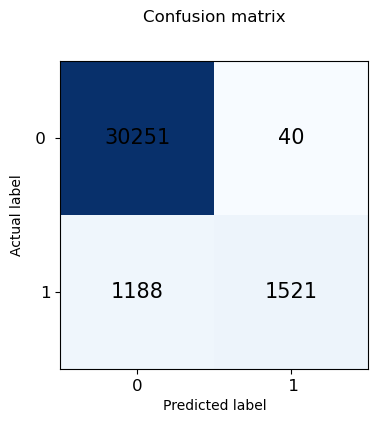

In [125]:
y_pred = knn_classifier.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
fig , ax = plt.subplots (figsize = (4,4))
im = ax.imshow(cm, cmap='Blues')  # Change the color map here

ax.grid (False)
ax.xaxis.set (ticks = (0 , 1) , ticklabels = ("0" , " 1"))
ax.yaxis.set (ticks = (0 , 1) , ticklabels = (" 0 " , "1"))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix', y=1.1)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_ylim (1.5 , -0.5)
for i in range (2):
    for j in range (2):
        ax.text (j , i , cnf_matrix[i,j] , ha = "center" , va ="center" , color ="Black", fontsize = 15 )
plt.show()

In [126]:
from sklearn.metrics import confusion_matrix, accuracy_score, zero_one_loss
Zero = zero_one_loss(y_test,y_pred,normalize=False) 
print('Zero One Loss Value: ', Zero)

Zero One Loss Value:  1228


# Applying Decision Tree Model

In [93]:
tree_classifier = DecisionTreeClassifier(criterion='entropy',  random_state=44)
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=44)

Calculate Train and Test score

In [94]:
print('Decision Tree Train Score is: ' , tree_classifier.score(X_train, y_train))
print('Decision Tree Test Score is: ' , tree_classifier.score(X_test, y_test))
print('Decision Tree Classes are: ' , tree_classifier.classes_)

Decision Tree Train Score is:  0.9993134328358209
Decision Tree Test Score is:  0.950939393939394
Decision Tree Classes are:  [0 1]


Calculate Predictions

In [95]:
y_pred = tree_classifier.predict(X_test)
y_pred_prob = tree_classifier.predict_proba(X_test)
print('Predicted Value for LogisticRegressionModel is: ' , y_pred[:10])
print('Prediction Probabilities Value for LogisticRegressionModel is: \n' , y_pred_prob[:10])

Predicted Value for LogisticRegressionModel is:  [0 0 0 0 0 0 0 0 0 0]
Prediction Probabilities Value for LogisticRegressionModel is: 
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


Calc confusion_matrix

In [129]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[29505   786]
 [  735  1974]]


Classification report

In [130]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     30291
           1       0.72      0.73      0.72      2709

    accuracy                           0.95     33000
   macro avg       0.85      0.85      0.85     33000
weighted avg       0.95      0.95      0.95     33000



Data visualization of the confusion matrix

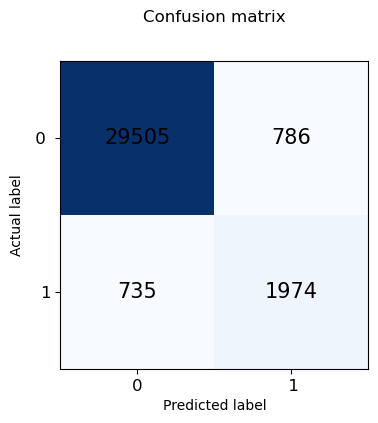

In [131]:
y_pred = tree_classifier.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
fig , ax = plt.subplots (figsize = (4,4))
im = ax.imshow(cm, cmap='Blues')  # Change the color map here

ax.grid (False)
ax.xaxis.set (ticks = (0 , 1) , ticklabels = ("0" , " 1"))
ax.yaxis.set (ticks = (0 , 1) , ticklabels = (" 0 " , "1"))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix', y=1.1)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_ylim (1.5 , -0.5)
for i in range (2):
    for j in range (2):
        ax.text (j , i , cnf_matrix[i,j] , ha = "center" , va ="center" , color ="Black", fontsize = 15 )
plt.show()


In [132]:
from sklearn.metrics import confusion_matrix, accuracy_score, zero_one_loss
Zero = zero_one_loss(y_test,y_pred,normalize=False) 
print('Zero One Loss Value: ', Zero)

Zero One Loss Value:  1521


# Applying Support Vector Machine

In [72]:
from sklearn.svm import SVC
svcmodel=SVC(kernel='linear',C=1,tol=0.001,gamma='auto',probability=True) #max_itre
svcmodel.fit(X_train,y_train)

SVC(C=1, gamma='auto', kernel='linear', probability=True)

Calc Train and Test Score

In [73]:
print('SVC Train Score is: ' , svcmodel.score(X_train, y_train))
print('SVC Test Score is: ' , svcmodel.score(X_test, y_test))
print('SVC Classes are: ' , svcmodel.classes_)

SVC Train Score is:  0.9609850746268657
SVC Test Score is:  0.9608181818181818
SVC Classes are:  [0 1]


Model Predictions

In [74]:
y_pred=svcmodel.predict(X_test)
y_prob = svcmodel.predict_proba(X_test)
print('The predicted value for SVC model is : ',y_pred[:5])
print('The probabilites of The prediction value for SVC model is \n : ',y_prob[:5])

The predicted value for SVC model is :  [0 0 0 0 0]
The probabilites of The prediction value for SVC model is 
 :  [[9.99879163e-01 1.20837055e-04]
 [9.99995082e-01 4.91796503e-06]
 [9.60004543e-01 3.99954569e-02]
 [9.78309468e-01 2.16905321e-02]
 [6.26853371e-01 3.73146629e-01]]


Calc Confusion Matrix

In [75]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[30011   143]
 [ 1150  1696]]


Classification Report

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     30154
           1       0.92      0.60      0.72      2846

    accuracy                           0.96     33000
   macro avg       0.94      0.80      0.85     33000
weighted avg       0.96      0.96      0.96     33000



Data visualization of the confusion matrix

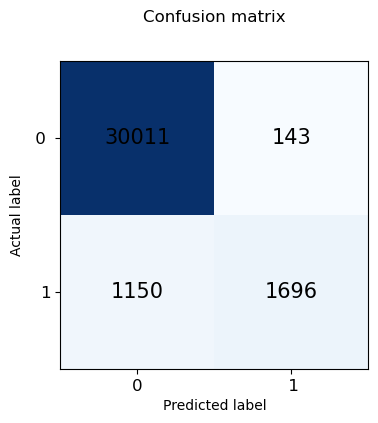

In [71]:
from sklearn import metrics
y_pred = svcmodel.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
fig , ax = plt.subplots (figsize = (4,4))
im = ax.imshow(cm, cmap='Blues')  # Change the color map here

ax.grid (False)
ax.xaxis.set (ticks = (0 , 1) , ticklabels = ("0" , " 1"))
ax.yaxis.set (ticks = (0 , 1) , ticklabels = (" 0 " , "1"))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix', y=1.1)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_ylim (1.5 , -0.5)
for i in range (2):
    for j in range (2):
        ax.text (j , i , cnf_matrix[i,j] , ha = "center" , va ="center" , color ="Black", fontsize = 15 )
plt.show()


In [76]:
from sklearn.metrics import confusion_matrix, accuracy_score, zero_one_loss
Zero = zero_one_loss(y_test,y_pred,normalize=False) 
print('Zero One Loss Value: ', Zero)

Zero One Loss Value:  1293


# Applying Random Forest Model

In [60]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, y_train)

C:\Users\Amera\Downloads\Anaconda\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', min_samples_split=10, n_jobs=-1,
                       oob_score=True, random_state=1)

Calc Train and Test Score

In [61]:
print('Random Forest Train Score is: ' , random_forest.score(X_train, y_train))
print('Random Forest Test Score is: ' , random_forest.score(X_test, y_test))
print('Random Forest Classes are: ' , random_forest.classes_)

Random Forest Train Score is:  0.9771940298507462
Random Forest Test Score is:  0.9713939393939394
Random Forest Classes are:  [0 1]


Model Predictions

In [80]:
y_pred=random_forest.predict(X_test)
y_prob = random_forest.predict_proba(X_test)
print('The predicted value for Random Forest model is : ',y_pred[:5])
print('The probabilites of The prediction value for Random Forest model is \n : ',y_prob[:5])

The predicted value for Random Forest model is :  [0 0 0 0 0]
The probabilites of The prediction value for Random Forest model is 
 :  [[0.99766234 0.00233766]
 [1.         0.        ]
 [0.93641696 0.06358304]
 [0.9233375  0.0766625 ]
 [0.78000728 0.21999272]]


Calc confusion_matrix

In [81]:
bm = confusion_matrix(y_test, y_pred)
print(bm)

[[30127    27]
 [  917  1929]]


Classification Report

In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     30154
           1       0.99      0.68      0.80      2846

    accuracy                           0.97     33000
   macro avg       0.98      0.84      0.89     33000
weighted avg       0.97      0.97      0.97     33000



Data visualization of the confusion matrix

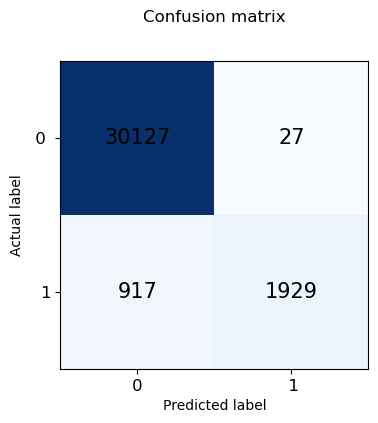

In [83]:
from sklearn import metrics
y_pred = random_forest.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
fig , ax = plt.subplots (figsize = (4,4))
im = ax.imshow(cm, cmap='Blues')  # Change the color map here

ax.grid (False)
ax.xaxis.set (ticks = (0 , 1) , ticklabels = ("0" , " 1"))
ax.yaxis.set (ticks = (0 , 1) , ticklabels = (" 0 " , "1"))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix', y=1.1)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_ylim (1.5 , -0.5)
for i in range (2):
    for j in range (2):
        ax.text (j , i , cnf_matrix[i,j] , ha = "center" , va ="center" , color ="Black", fontsize = 15 )
plt.show()


In [84]:
from sklearn.metrics import confusion_matrix, accuracy_score, zero_one_loss
Zero = zero_one_loss(y_test,y_pred,normalize=False) 
print('Zero One Loss Value: ', Zero)

Zero One Loss Value:  944


# Applying Naive Bayes Model

In [96]:
from sklearn.naive_bayes import GaussianNB
naive_classifier = GaussianNB()
naive_classifier.fit(X_train, y_train)

GaussianNB()

Calculate Train and Test Score

In [97]:
print('Naive Bayes Model Train Score is: ' , naive_classifier.score(X_train, y_train))
print('Naive Bayes Model Test Score is: ' , naive_classifier.score(X_test, y_test))
print('Naive Bayes Model Classes are: ' , naive_classifier.classes_)

Naive Bayes Model Train Score is:  0.903134328358209
Naive Bayes Model Test Score is:  0.9021515151515151
Naive Bayes Model Classes are:  [0 1]


Calculate Predictions

In [98]:
y_pred = naive_classifier.predict(X_test)
y_pred_prob = naive_classifier.predict_proba(X_test)
print('Predicted Value for Naive Bayes Model is: ' , y_pred[:10])
print('Prediction Probabilities Value for Naive Bayes Model is: \n' , y_pred_prob[:10])

Predicted Value for Naive Bayes Model is:  [0 0 0 0 1 0 0 0 0 0]
Prediction Probabilities Value for Naive Bayes Model is: 
 [[9.99166299e-01 8.33701010e-04]
 [9.99996038e-01 3.96200167e-06]
 [9.93861831e-01 6.13816899e-03]
 [9.99951664e-01 4.83356008e-05]
 [1.49981027e-02 9.85001897e-01]
 [9.99880814e-01 1.19185764e-04]
 [9.99805867e-01 1.94132607e-04]
 [9.89561398e-01 1.04386018e-02]
 [9.94190753e-01 5.80924703e-03]
 [9.99904809e-01 9.51908193e-05]]


Calculate confusion_matrix

In [139]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[28081  2210]
 [  937  1772]]


Classification Report

In [140]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     30291
           1       0.45      0.65      0.53      2709

    accuracy                           0.90     33000
   macro avg       0.71      0.79      0.74     33000
weighted avg       0.92      0.90      0.91     33000



Data visualization of the confusion matrix

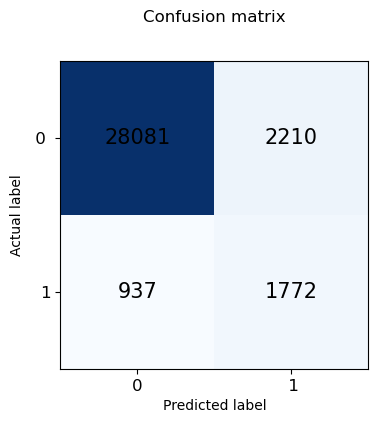

In [142]:
y_pred = naive_classifier.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
fig , ax = plt.subplots (figsize = (4,4))
im = ax.imshow(cm, cmap='Blues')  # Change the color map here

ax.grid (False)
ax.xaxis.set (ticks = (0 , 1) , ticklabels = ("0" , " 1"))
ax.yaxis.set (ticks = (0 , 1) , ticklabels = (" 0 " , "1"))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix', y=1.1)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_ylim (1.5 , -0.5)
for i in range (2):
    for j in range (2):
        ax.text (j , i , cnf_matrix[i,j] , ha = "center" , va ="center" , color ="Black", fontsize = 15 )
plt.show()


In [143]:
from sklearn.metrics import confusion_matrix, accuracy_score, zero_one_loss
ZeroOneLossValue = zero_one_loss(y_test,y_pred,normalize=False) 
print('Zero One Loss Value: ', ZeroOneLossValue)

Zero One Loss Value:  3147


In [101]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [104]:
print('Linear Regression Train Score is: ' , linear_model.score(X_train, y_train))
print('Linear Regression Test Score is: ' , linear_model.score(X_test, y_test))

Linear Regression Train Score is:  0.3460258366076667
Linear Regression Test Score is:  0.3536931734054336


Results of All Models

In [99]:
model_dict = {
    "KNN": knn_classifier.score(X_test, y_test),
    "LogisticRegression": log_reg.score(X_test, y_test),
    "Naive Bayes": naive_classifier.score(X_test, y_test),
    "DecisionTreeClassifier": tree_classifier.score(X_test, y_test),
    "SVC": svcmodel.score(X_test, y_test),
    "Random Forest": random_forest.score(X_test, y_test)
}
model_accuracies_df = pd.DataFrame(columns=['Model', 'Accuracy'])
model_accuracies_df['Model'] = model_dict.keys()
model_accuracies_df['Accuracy'] = model_dict.values()
print("Models Accuracies in Descending Order: ")
print(model_accuracies_df.sort_values(by = "Accuracy", ascending=False, ignore_index=True))

Models Accuracies in Descending Order: 
                    Model  Accuracy
0           Random Forest  0.971394
1                     KNN  0.961212
2                     SVC  0.960818
3      LogisticRegression  0.959636
4  DecisionTreeClassifier  0.950939
5             Naive Bayes  0.902152
